In [1]:
import sys

# Specify the directory you want to add
custom_path = './..'

# Add the directory to sys.path
if custom_path not in sys.path:
    sys.path.append(custom_path)

In [2]:
from __future__ import absolute_import
import importlib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from models import MLP, OneOverSqr
from runners import wrap_runner_for_optimization
from fitting_utils import create_fitting_loss
from dsp_utils import smooth_signal

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
opt_data = {}
for i in range(24):
    with open(f'sweek_k1k3_try2_{i}.pkl','rb') as f:
        opt_data[i] = pickle.load(f)

In [5]:
from misc import parse_log_file

In [ ]:
log_data = {}
for i in range(24):
    f = f'sweek_k1k3_try2_{i}.log'
    log_data[i] = parse_log_file(f)
    

In [29]:
x_manu = {}
v_manu = {}
for i in range(24):
    this_log_data = log_data[i]
    x_manu[i] = this_log_data['x'][np.nanargmin(this_log_data['value'])]
    v_manu[i] = np.nanmin(this_log_data['value'])

In [30]:
v_manu

{0: 170.2768,
 1: 124.5857,
 2: 42.2541,
 3: 17.8328,
 4: 66.7281,
 5: 32.169,
 6: 40.0374,
 7: 40.8088,
 8: 81.1611,
 9: 43.0059,
 10: 43.4285,
 11: 51.6987,
 12: 67.27,
 13: 33.2983,
 14: 155.0552,
 15: 92.4456,
 16: 184.2457,
 17: 64.7672,
 18: 177.7378,
 19: 61.3904,
 20: 39.8923,
 21: 417.8119,
 22: 236.6877,
 23: 26.9569}

In [31]:
for i in range(24):
    x_auto = opt_data[i]['MSE']['x']
    print(x_auto - x_manu[i])



[-4.65101557e-09 -2.25129722e-09  3.32280651e-09  1.33515243e-09
  1.14547816e-09 -7.71922304e-10]
[-2.79393042e-09 -3.41490003e-10  2.28937935e-09  4.39584369e-09
  3.04054892e-09 -2.97442082e-09]
[ 2.64061040e-09 -4.68474773e-09  2.66817679e-10 -4.52393323e-09
  1.82161375e-09 -2.83767965e-09]
[ 0.72536815  0.07389771  0.45       -0.08385745 -0.47091558  0.43131927]
[ 1.27535182e-09  1.24545108e-09  1.34382172e-09  2.88169844e-09
 -2.78901591e-09 -3.20739901e-09]
[ 3.82857301e-09 -2.68529865e-10  4.34083480e-09 -4.10718570e-09
 -1.09702625e-09  2.48194132e-10]
[ 0.05779645 -0.35168041  0.10703548 -0.10155254 -0.29609581 -0.14845562]
[ 1.63511427e-09  3.86115917e-10 -4.39467696e-09 -2.95407432e-09
  1.12937049e-10 -2.69201994e-09]
[-4.06306988e-09  7.41440187e-10  0.00000000e+00  3.90284072e-09
 -2.63686206e-09 -1.73706149e-09]
[ 2.83620860e-09  4.42153014e-09  3.56678065e-09 -1.19401733e-09
  2.90307245e-09 -4.04371758e-09]
[ 3.90359300e-09  1.97776462e-10  2.73185585e-09 -5.68924463

{'value': array([2.90688100e+02, 3.82679200e+02, 3.36285400e+02, 2.80399600e+02,
        2.55054900e+02, 2.51120200e+02, 3.07763300e+02, 2.55651100e+02,
        3.33953900e+02, 1.86964400e+02, 2.19226600e+02, 2.47977300e+02,
        1.88865200e+02, 5.73158900e+02,            nan, 1.94957400e+02,
        2.04688500e+02, 2.68952200e+02, 2.46376700e+02, 2.75094000e+02,
        4.13087200e+02,            nan, 4.96069500e+02, 1.96013500e+02,
        2.86591300e+02, 3.41414700e+02, 4.67569200e+02, 2.31955000e+02,
        4.49786100e+02, 2.52224800e+02, 2.03809900e+02,            nan,
        2.35458600e+02, 2.04806100e+02, 2.08853700e+02, 7.42700500e+02,
        3.93324200e+02, 4.73581800e+02, 2.82820800e+02, 2.55555300e+02,
        4.54464200e+02, 3.75978000e+02, 2.44996600e+02, 2.92604400e+02,
        4.56782900e+02, 2.67798200e+02, 1.70276800e+02, 3.09733800e+02,
                   nan,            nan, 3.64307800e+02, 5.57727200e+02,
        2.85762700e+02, 1.46346490e+03, 3.86008800e+02,

In [ ]:
manual_opt_data = 

In [32]:


def scale_and_bias(x,bias=0,scale=45.0):
    x = np.array(x)
    return x*scale + bias
#to sweep
fixed_params = {}
fixed_params['model'] =  dict(n_inputs = 3,
        n_hidden = 5*4*512,
        n_outs = 1,
        en_bias = False,
        b_high=3, first_layer_init='uniform_unity',
        first_layer_weights_trainable = True,
        out_layer_init='zeros')         

fixed_params['runner'] = {'criterion':'MSE', 'k':[0,1,0], 'sigma_noi':0.0, 'tau_u':1,
                        'save_model_at_init':False, 'ic_param_file':None}

optim_param_mapping= [('custom','normalized_log_lr'),
                    ('model','skip_gain'),                      
                    ('custom','w'),
                    ('postprocessing','scale'),
                    ('custom', 'k1'),
                    ('custom', 'k3'),
                    ]

custom_param_mappings = [{'cathegory':'runner','param_name':'learning_rate',
                        'fun': lambda x: 10.**x['normalized_log_lr']/x['w']},
                        {'cathegory':'runner','param_name':'k',
                        'fun': lambda x: [x['k1'],0,x['k3']]},
                        {'cathegory':'model','param_name':'nl','fun': lambda x: (lambda : OneOverSqr(w=x['w']))}]



wrapped_runner = wrap_runner_for_optimization(model_class=MLP, 
                                             fixed_params=fixed_params,
                                             optim_params_mapping=optim_param_mapping,
                                             custom_param_mappings=custom_param_mappings, 
                                             postprocessing_fun=scale_and_bias)


In [33]:
df = pd.read_csv('../../../frogs_project/data/avraham__ivry_fig1_rotFig1_v2.csv',header=None)
df = df.T
data = df.to_numpy()

In [34]:
stimulus = [(1,40),(0,40)]
pooling_fun = 'MSE'

In [35]:
errors = [opt_data[k][pooling_fun]['fun'] for k in opt_data]


In [36]:
np.mean(errors)

nan

In [37]:
# outs  = {k: wrapped_runner([(1,40),(0,40)],opt_data[k][pooling_fun]['x']) for k in opt_data}

outs  = {i: wrapped_runner([(1,40),(0,40)],x_manu[i]) for i in range(24)}

In [38]:
outs_ = [o for _,o in outs.items()]
outs_ = np.array(outs_)

In [39]:
outs_.mean()

18.854016308608358

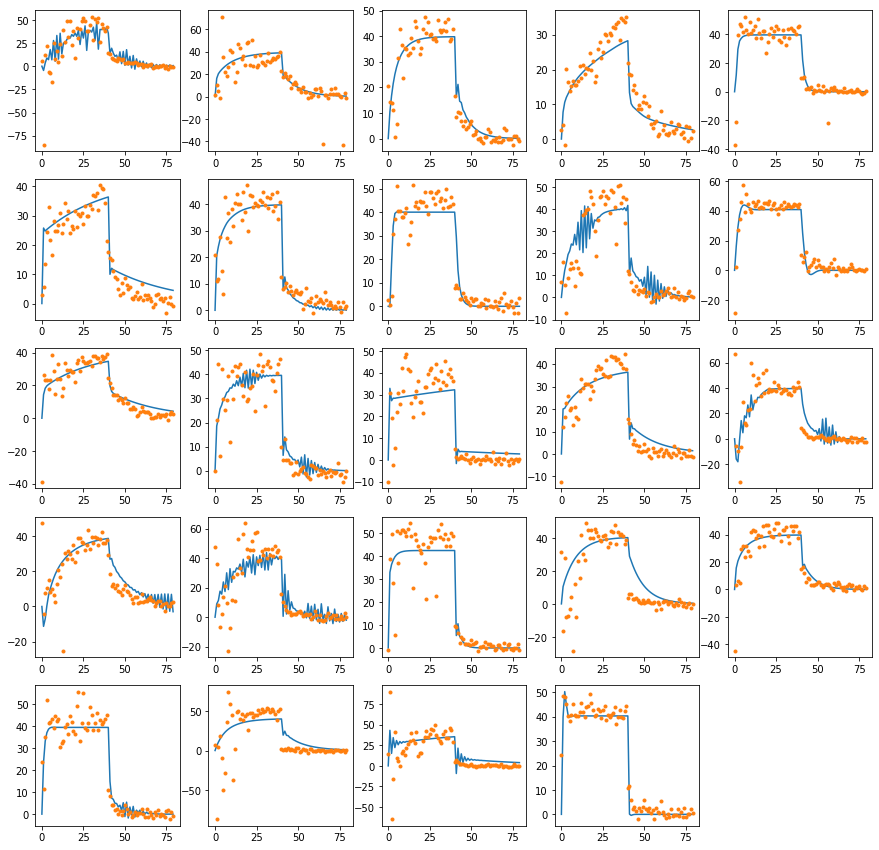

In [40]:
plt.figure(figsize=(15,15))
for k in opt_data:
    plt.subplot(5,5,k+1)
    plt.plot(outs[k])
    plt.plot(data[:80,k],'.')
# plt.plot(data[:80,0],'.')
# plt.plot(smooth_signal(data[:,0],3))


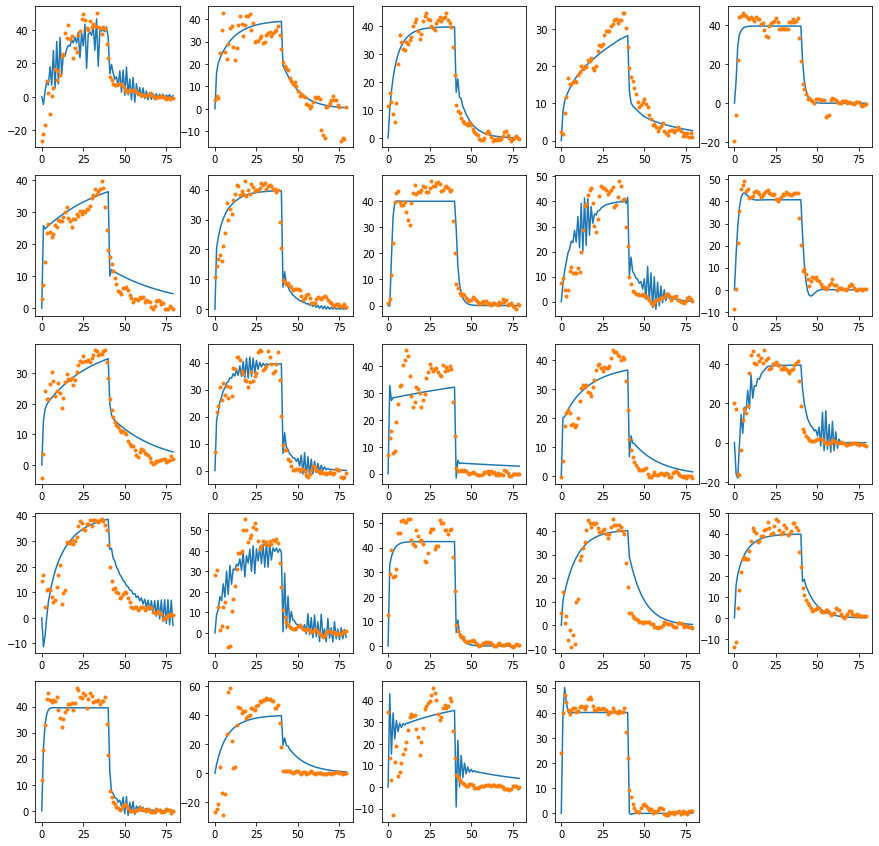

In [41]:
plt.figure(figsize=(15,15))
for k in opt_data:
    plt.subplot(5,5,k+1)
    plt.plot(outs[k])
    plt.plot(smooth_signal(data[:80,k],3),'.')

In [43]:
diffs = outs_.T-data[:80,:]
np.mean(diffs[:80,:]**2)

98.05076320371259

In [15]:
for setting in pooling_funs +[appendix]:
    plt.plot(outs[setting])
plt.plot(data[:,0],'x')
plt.plot(data[:80,0],'x')

plt.xlim([39,120])
plt.ylim([-5,60])


NameError: name 'pooling_funs' is not defined

In [ ]:
mae = lambda x: np.mean(np.abs(x))
mse = lambda x: np.mean(np.square(x))


In [ ]:
for setting in pooling_funs +[appendix]:
    fit_err = outs[setting][:80] - data[:80,0]
    val_err = outs[setting][80:] - data[80:,0]
    print(f'fit objective: {setting}')
    print(f' fitting MAE: {mae(fit_err)}; MSE: {mse(fit_err)}')
    print(f' validation MAE: {mae(val_err)}; MSE: {mse(val_err)}')

In [ ]:
import scipy
scipy.__version__

In [ ]:
# !pip3 install --upgrade pip

In [ ]:
# pip install --upgrade scipy

In [ ]:
import pickle

In [ ]:
with open('sweep_1_subj_12.pkl','rb') as f:
    opt_data = pickle.load(f)

In [ ]:
opt_data